In [1]:

import matplotlib.pyplot as plt
%matplotlib inline

import os
import copy

import numpy as np
import pandas as pd

from funcs.custom_detrending import custom_detrending, iteratively_remove_sines
from funcs.funcs import read_custom_aperture_lc

import astropy.units as u

from scipy import optimize

CWD = "/".join(os.getcwd().split("/")[:-2])

import warnings
warnings.simplefilter("ignore")

from funcs.multiperiod import show_flare, find_period, remove_sinusoidal

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
lcs = pd.read_csv(f"{CWD}/data/summary/lcs.csv")
lcs

,ID,QCS,typ,mission,prefix,origin,h_mission,SpT,view_start,view_stop,view_min,view_max,BJDoff,tstart,ampl_min,ampl_max
0,100004076,14,slc,kep,KIC,generic,Kepler,L1,1356.50,1361.00,600,1050,2454833,1358.550,NaN,NaN
1,212035340,18,llc,ktwo,EPIC,generic,K2,M8,3437.00,3439.50,100,900,2454833,NaN,NaN,NaN
2,237880881,1,slc,tess,TIC,generic,TESS,M5,1331.00,1333.50,560,700,2457000,NaN,NaN,NaN
3,44984200,10,slc,tess,TIC,custom,TESS,M6,1587.25,1589.75,1620,2200,2457000,1588.030,0.5,0.8
4,277539431,12,slc,tess,TIC,custom,TESS,M7,1641.00,1643.50,750,970,2457000,1641.835,0.9,1.7


In [ ]:
target = lcs.loc[4]
target


### Just show the flare

In [ ]:


for i, row in lcs.iterrows():
    show_flare(row, save=False)

### Find the modulation period

In [ ]:
for i, row in lcs.iterrows():
    period, mfp = find_period(row, save=False)
    print(period.to("d"))

## Fit a sinusoidal modulation

0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


KIC 100004076 modulation period:  8.880603057671022 h
Relative amplitude of modulation: -6.4e-03
EPIC 212035340 modulation period:  4.625968870015097 h


10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


Relative amplitude of modulation: 5.5e-02
TIC 237880881 modulation period:  8.431534500702735 h
Relative amplitude of modulation: -1.3e-02
TIC 44984200 modulation period:  2.712025530313231 h
Relative amplitude of modulation: 4.9e-03
TIC 277539431 modulation period:  4.556908315121535 h
Relative amplitude of modulation: 5.4e-03


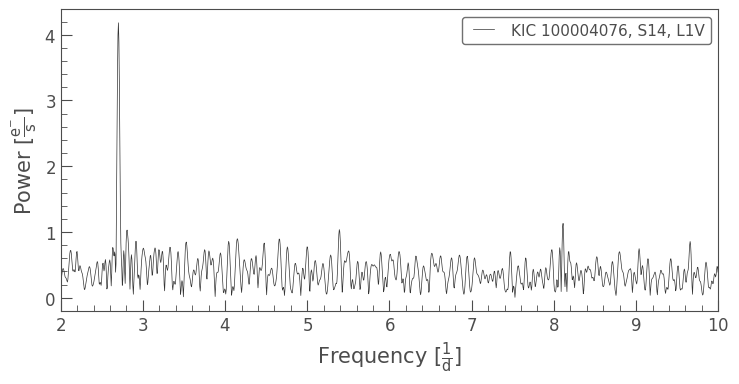

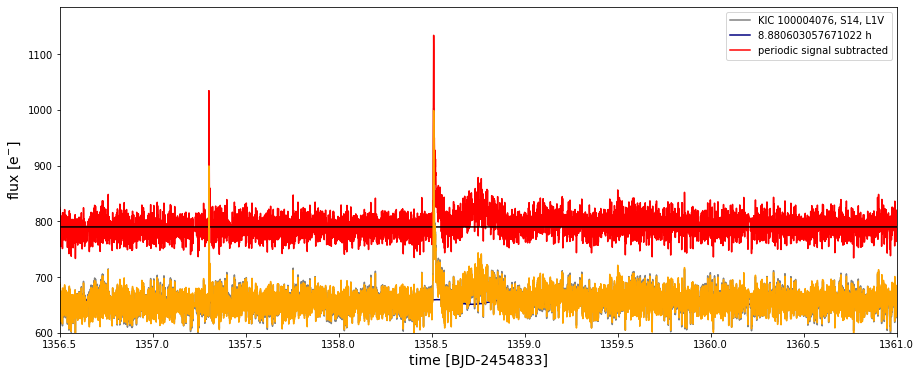

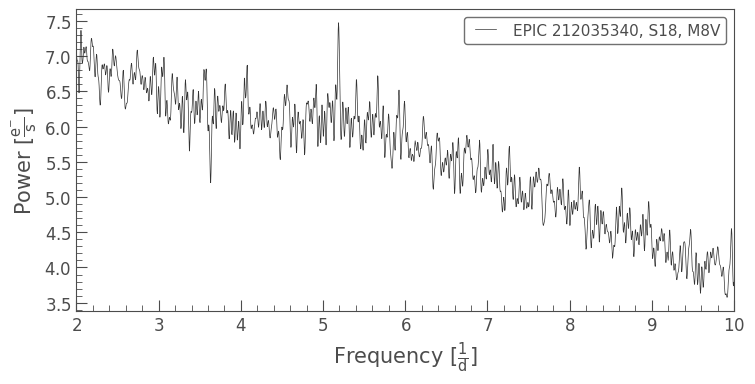

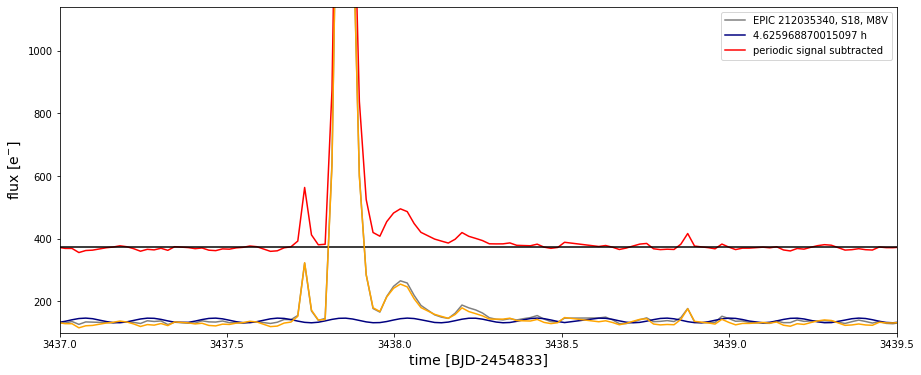

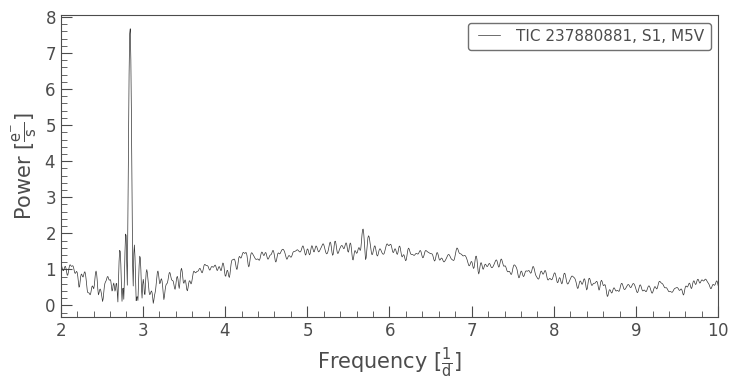

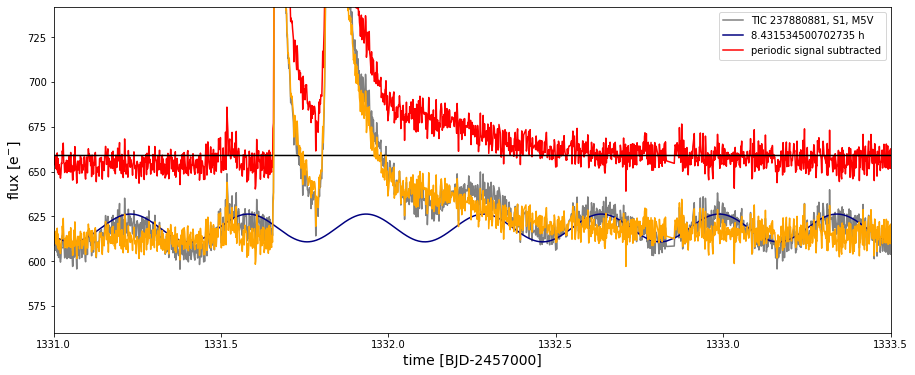

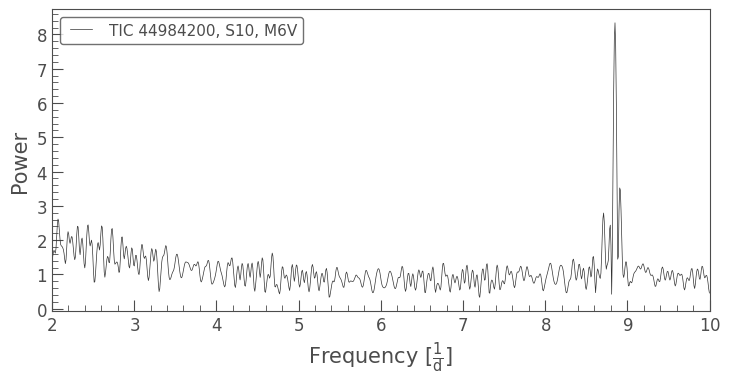

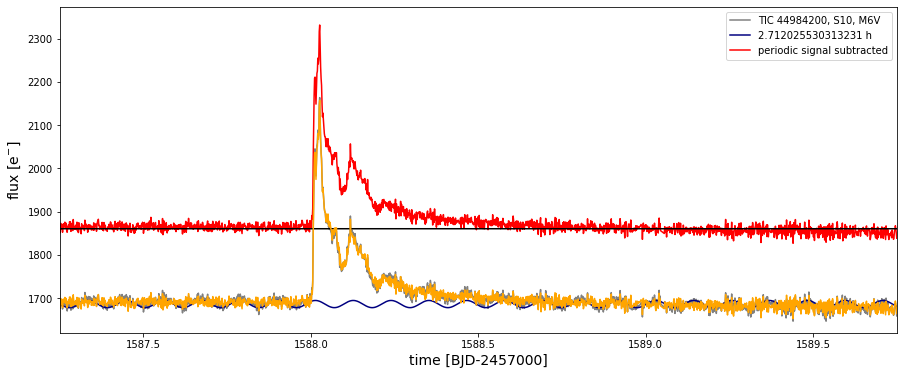

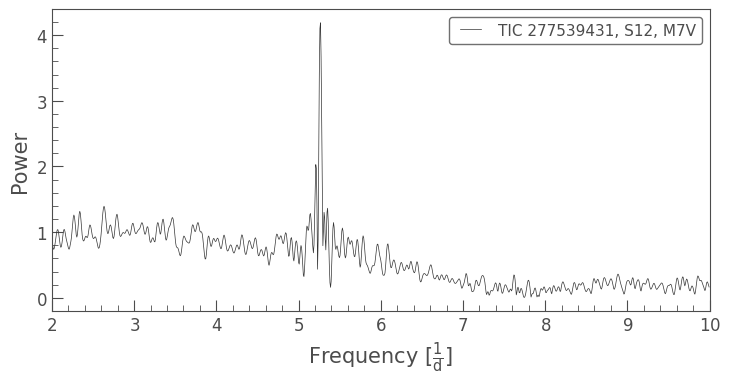

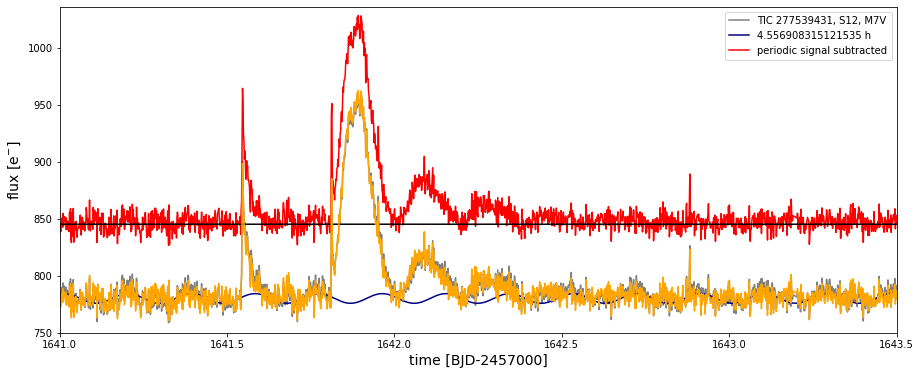

In [4]:
for i, row in lcs.iterrows():
    t, s_flux = remove_sinusoidal(row)

In [ ]:
print(f"TIC {TIC}, sector {c}:\n"\
      f"Modulation period: {period:.2f}\n"\
      f"Estimated ED from duration-amplitude relation: {EDest[0]:.0f}-{EDest[1]:.0f} s\n"\
      f"Estimated ED from flare fit: {medED:.0f}+/-{stdED:.0f} s\n"\
      f"Relative amplitude of modulation: {rel_amplitude:.1e}")